In [209]:
from pandas import read_csv, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
from sklearn.tree import DecisionTreeClassifier

import numpy as math
import matplotlib.pyplot as plot

In [210]:
X = read_csv('wino.csv')
y = X.pop('jakość')
K = X.columns
skróty = {
    'kwasowość': 'kw.',
    'lotna kwasowość': 'kw.lot',
    'kwas cytrynowy': 'kws.cyt.',
    'pozostały cukier': 'cuk.',
    'wolne chlorki': 'chl.',
    'dwutlenek siarki': 'SO2',
    'dwutlenek siarki całkowity': 'SO2-c.',
    'gęstość': 'gęst.',
    'siarczany': 'siar.',
    'alkohol': 'alk.',
    'pH': 'pH',
    'jakość': 'jak.',
    'czerwone': 'cz.'
}; K_s = [skróty[k] for k in K]

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [211]:
def fit_tree(X,y):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X, y)
    return model

M0 = fit_tree(X, y)

## Ocena drzewa

Widać, że drzewo jest całkiem poprawne, jednak dużo z tego wynika z nierówności w grupach, co widać
na histogramie zmiennej `jakość`.

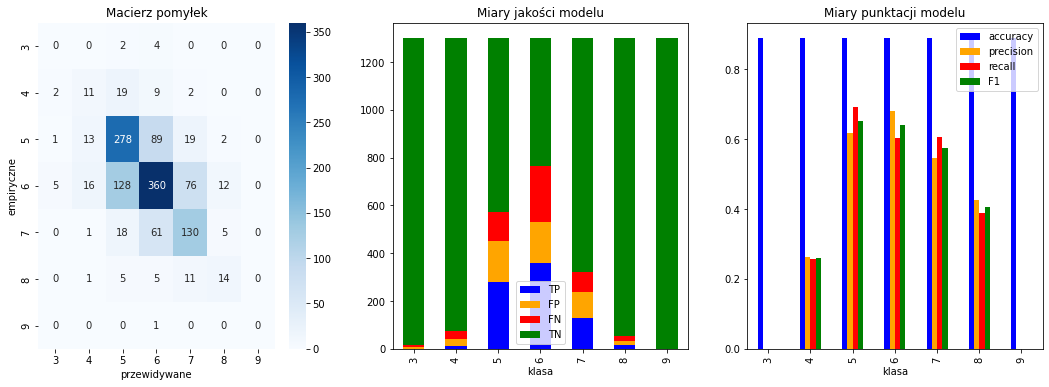

In [332]:
from seaborn import heatmap
from pandas import DataFrame
import matplotlib.pyplot as plot
def confusion_matrix_plot(matrix, ax=None):
    if ax is None:
        ax = plot.gca()
    heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('przewidywane')
    ax.set_ylabel('empiryczne')
    ax.set_title('Macierz pomyłek')

def confusion_matrix_stats(matrix, ax=None):

    true_positive = matrix.values.diagonal()
    false_positive = matrix.sum(axis=0) - true_positive
    false_negative = matrix.sum(axis=1) - true_positive
    true_negative = matrix.values.sum() - (true_positive + false_positive + false_negative)

    stats = DataFrame({
        'TP': true_positive,
        'FP': false_positive,
        'FN': false_negative,
        'TN': true_negative
    }, index=matrix.index)

    if ax is None:
        ax = plot.gca()

    colors = ['blue', 'orange', 'red', 'green']
    stats.plot.bar(ax=ax, color=colors, stacked=True)
    ax.set_title('Miary jakości modelu')
    ax.set_ylabel('')
    ax.set_xlabel('klasa')

    return stats

def confusion_matrix_scores(stats, index, ax=None):

    accuracy = (sum(stats.TP) + sum(stats.TN)) / stats.sum().sum()
    precision = stats.TP / (stats.TP + stats.FP)
    recall = stats.TP / (stats.TP + stats.FN)
    F1 = 2 * precision * recall / (precision + recall)

    precision.replace(math.nan, 0, inplace=True)
    recall.replace(math.nan, 0, inplace=True)
    F1.replace(math.nan, 0, inplace=True)

    scores = DataFrame({
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'F1': F1
    }, index=index)

    if ax is None:
        ax = plot.gca()

    colors = ['blue', 'orange', 'red', 'green']
    scores.plot.bar(ax=ax, color=colors)
    ax.set_title('Miary punktacji modelu')
    ax.set_ylabel('')
    ax.set_xlabel('klasa')

def tree_quality_plot(X_test, y_test, M):

    fig, axes = plot.subplots(1, 3, figsize=(18, 6))

    matrix = confusion_matrix(y_test, M.predict(X_test))
    matrix = DataFrame(matrix, index=M.classes_, columns=M.classes_)

    confusion_matrix_plot(matrix, ax=axes[0])
    stats = confusion_matrix_stats(matrix, ax=axes[1])
    scores = confusion_matrix_scores(stats, index=M.classes_)

tree_quality_plot(X_test, y_test, M0)